In [1]:
#Loading Packages and Data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('LoanExport.csv')

C:\Users\Diljith\AppData\Local\Temp\ipykernel_18008\1021084586.py:9: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('LoanExport.csv')


In [2]:
print("Initial Data Preview:")
print(df.head())

Initial Data Preview:
   CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  MIP  \
0            0            199902                  N        202901  16974   25   
1            0            199902                  N        202901  19740    0   
2            0            199902                  N        202901  29940    0   
3            0            199902                  N        202901  31084    0   
4            0            199902                  N        202901  35644    0   

   Units Occupancy  OCLTV  DTI  ...  PostalCode    LoanSeqNum  LoanPurpose  \
0      1         O     89   27  ...       60400  F199Q1268030            P   
1      1         O     73   17  ...       80200  F199Q1015092            N   
2      1         O     75   16  ...       66000  F199Q1266886            N   
3      1         O     76   14  ...       90700  F199Q1178167            N   
4      1         O     78   18  ...        7600  F199Q1178517            N   

  OrigLoanTerm NumBorr

In [3]:
print("\nMissing Values Per Column:")
print(df.isnull().sum())


Missing Values Per Column:
CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64


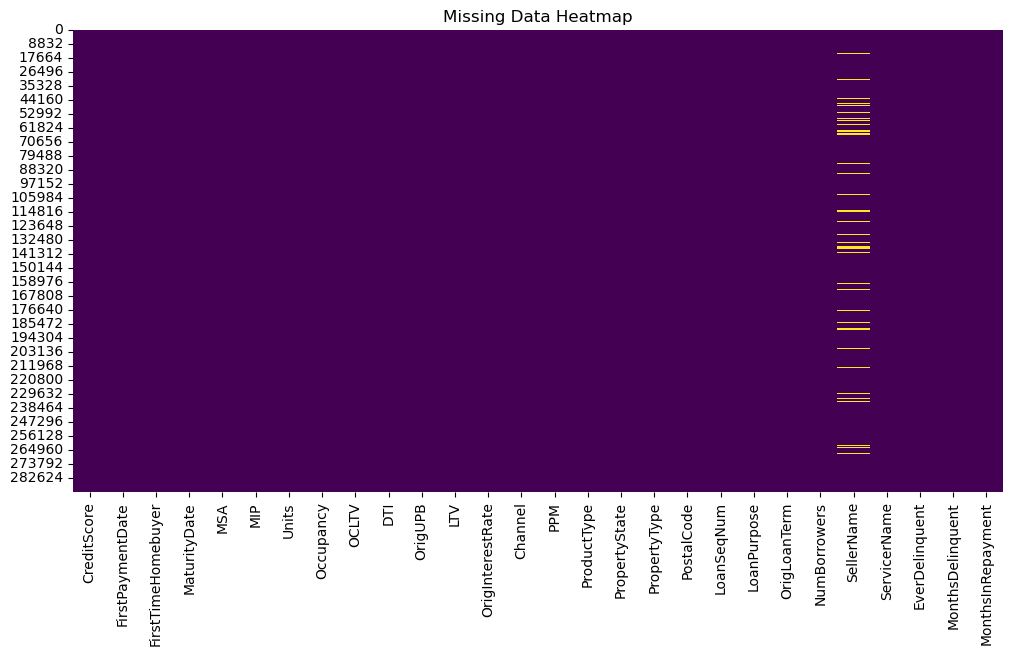

In [4]:
# Visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [5]:
# Fill null values
df.fillna(df.median(), inplace=True)  
df.fillna(df.mode().iloc[0], inplace=True) 

# Remove duplicate rows (if any)
df.drop_duplicates(inplace=True) 

C:\Users\Diljith\AppData\Local\Temp\ipykernel_18008\3885709044.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


In [6]:
print(df.dtypes) 

CreditScore             int64
FirstPaymentDate        int64
FirstTimeHomebuyer     object
MaturityDate            int64
MSA                    object
MIP                     int64
Units                   int64
Occupancy              object
OCLTV                   int64
DTI                     int64
OrigUPB                 int64
LTV                     int64
OrigInterestRate      float64
Channel                object
PPM                    object
ProductType            object
PropertyState          object
PropertyType           object
PostalCode             object
LoanSeqNum             object
LoanPurpose            object
OrigLoanTerm            int64
NumBorrowers           object
SellerName             object
ServicerName           object
EverDelinquent          int64
MonthsDelinquent        int64
MonthsInRepayment       int64
dtype: object


In [7]:
df.describe()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,68.408791,13.821228,16.090508,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291451 entries, 0 to 291450
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         291451 non-null  int64  
 1   FirstPaymentDate    291451 non-null  int64  
 2   FirstTimeHomebuyer  291451 non-null  object 
 3   MaturityDate        291451 non-null  int64  
 4   MSA                 291451 non-null  object 
 5   MIP                 291451 non-null  int64  
 6   Units               291451 non-null  int64  
 7   Occupancy           291451 non-null  object 
 8   OCLTV               291451 non-null  int64  
 9   DTI                 291451 non-null  int64  
 10  OrigUPB             291451 non-null  int64  
 11  LTV                 291451 non-null  int64  
 12  OrigInterestRate    291451 non-null  float64
 13  Channel             291451 non-null  object 
 14  PPM                 291451 non-null  object 
 15  ProductType         291451 non-nul

In [9]:
df.isnull().sum()


CreditScore           0
FirstPaymentDate      0
FirstTimeHomebuyer    0
MaturityDate          0
MSA                   0
MIP                   0
Units                 0
Occupancy             0
OCLTV                 0
DTI                   0
OrigUPB               0
LTV                   0
OrigInterestRate      0
Channel               0
PPM                   0
ProductType           0
PropertyState         0
PropertyType          0
PostalCode            0
LoanSeqNum            0
LoanPurpose           0
OrigLoanTerm          0
NumBorrowers          0
SellerName            0
ServicerName          0
EverDelinquent        0
MonthsDelinquent      0
MonthsInRepayment     0
dtype: int64

In [10]:
# Convert the 'FirstPaymentDate' column to datetime using the specified format
df['FirstPaymentDate'] = pd.to_datetime(df['FirstPaymentDate'], format='%Y%m', errors='coerce')

# Convert the 'MaturityDate' column to datetime using the specified format
df['MaturityDate'] = pd.to_datetime(df['MaturityDate'], format='%Y%m', errors='coerce')

# Checking if the conversion was successful
print("Date Conversion Result:")
print(df[['FirstPaymentDate', 'MaturityDate']].head())

Date Conversion Result:
  FirstPaymentDate MaturityDate
0       1999-02-01   2029-01-01
1       1999-02-01   2029-01-01
2       1999-02-01   2029-01-01
3       1999-02-01   2029-01-01
4       1999-02-01   2029-01-01


In [11]:
df['MSA']=df['MSA'].replace('X', 0)
df['MSA']=pd.to_numeric(df['MSA'], errors='coerce')

In [12]:
# Convert data types if necessary
df['PostalCode'] = pd.to_numeric(df['PostalCode'], errors='coerce')
df['NumBorrowers'] = pd.to_numeric(df['NumBorrowers'], errors='coerce')


df.drop(columns=['LoanSeqNum'], inplace=True)
df.drop(columns=['ServicerName'], inplace=True)
df.drop(columns=['FirstPaymentDate'], inplace=True)
df.drop(columns=['MaturityDate'], inplace=True)






print("\nData Types After Correction:")
print(df.dtypes)  # Ensure data types are corrected

# Re-check for missing values after handling
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

# Final dataset preview after cleaning
print("\nCleaned Data Preview:")
print(df.head())


Data Types After Correction:
CreditScore             int64
FirstTimeHomebuyer     object
MSA                   float64
MIP                     int64
Units                   int64
Occupancy              object
OCLTV                   int64
DTI                     int64
OrigUPB                 int64
LTV                     int64
OrigInterestRate      float64
Channel                object
PPM                    object
ProductType            object
PropertyState          object
PropertyType           object
PostalCode            float64
LoanPurpose            object
OrigLoanTerm            int64
NumBorrowers          float64
SellerName             object
EverDelinquent          int64
MonthsDelinquent        int64
MonthsInRepayment       int64
dtype: object

Missing Values After Cleaning:
CreditScore               0
FirstTimeHomebuyer        0
MSA                   39100
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI     

In [13]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Display the categorical and numerical columns
print("Categorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)


Categorical Columns:
Index(['FirstTimeHomebuyer', 'Occupancy', 'Channel', 'PPM', 'ProductType',
       'PropertyState', 'PropertyType', 'LoanPurpose', 'SellerName'],
      dtype='object')

Numerical Columns:
Index(['CreditScore', 'MSA', 'MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'PostalCode', 'OrigLoanTerm', 'NumBorrowers',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')


In [14]:
# List of categorical columns to encode
categorical_columns = ['FirstTimeHomebuyer', 'Occupancy', 'Channel', 'PPM', 'ProductType',
                       'PropertyState', 'PropertyType', 'LoanPurpose', 'SellerName']

# Apply One-Hot Encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded dataset
print("Data After Encoding:")
print(df_encoded.head())

Data After Encoding:
   CreditScore      MSA  MIP  Units  OCLTV  DTI  OrigUPB  LTV  \
0            0  16974.0   25      1     89   27   117000   89   
1            0  19740.0    0      1     73   17   109000   73   
2            0  29940.0    0      1     75   16    88000   75   
3            0  31084.0    0      1     76   14   160000   76   
4            0  35644.0    0      1     78   18   109000   78   

   OrigInterestRate  PostalCode  ...  SellerName_GM  SellerName_HO  \
0             6.750     60400.0  ...              0              0   
1             6.500     80200.0  ...              0              0   
2             6.875     66000.0  ...              0              0   
3             6.875     90700.0  ...              1              0   
4             7.125      7600.0  ...              1              0   

   SellerName_NO  SellerName_OL  SellerName_Ot  SellerName_PN  SellerName_PR  \
0              0              0              0              0              0   
1      

In [15]:
columns_to_remove = ['MSA', 'PostalCode', 'NumBorrowers']

# Drop the specified columns
df_encoded = df_encoded.drop(columns=columns_to_remove)

In [16]:
df_encoded.head()

,CreditScore,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,...,SellerName_GM,SellerName_HO,SellerName_NO,SellerName_OL,SellerName_Ot,SellerName_PN,SellerName_PR,SellerName_RE,SellerName_ST,SellerName_WA
0,0,25,1,89,27,117000,89,6.750,360,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,73,17,109000,73,6.500,360,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,75,16,88000,75,6.875,360,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,76,14,160000,76,6.875,360,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,78,18,109000,78,7.125,360,0,...,1,0,0,0,0,0,0,0,0,0


In [17]:
df_encoded.shape

(291451, 100)

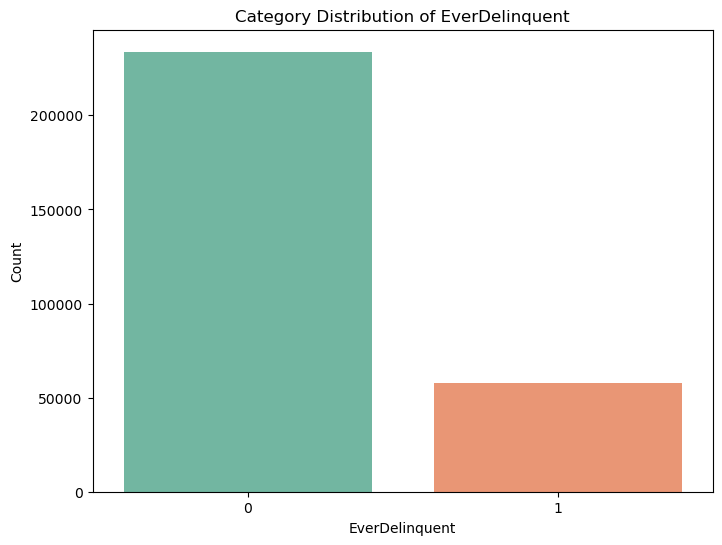

In [18]:
target=df_encoded['EverDelinquent'].values

# Create a count plot to show the distribution of categories
plt.figure(figsize=(8, 6))
sns.countplot(x=target, palette='Set2')
plt.title('Category Distribution of EverDelinquent')
plt.xlabel('EverDelinquent')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Ensure labels are readable
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming df_encoded is your DataFrame and 'EverDelinquent' is the target column

# Separate features and target variable
X = df_encoded.drop('EverDelinquent', axis=1)  # Features
y = df_encoded['EverDelinquent']                # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Print accuracy and confusion matrix
    print(f"Accuracy of the {name} model: {accuracy:.2f}")
    print(f"Confusion Matrix for {name} model:")
    print(conf_matrix)
    print(classification_report(y_test, y_pred))  # Optional: For a detailed performance report
    print()


Accuracy of the Logistic Regression model: 1.00
Confusion Matrix for Logistic Regression model:
[[70135     0]
 [    0 17301]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70135
           1       1.00      1.00      1.00     17301

    accuracy                           1.00     87436
   macro avg       1.00      1.00      1.00     87436
weighted avg       1.00      1.00      1.00     87436


Accuracy of the Random Forest model: 1.00
Confusion Matrix for Random Forest model:
[[70135     0]
 [    0 17301]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70135
           1       1.00      1.00      1.00     17301

    accuracy                           1.00     87436
   macro avg       1.00      1.00      1.00     87436
weighted avg       1.00      1.00      1.00     87436


